#### Part 1) Create a dataset that contains the monthly means of Sea Surface Temperature anomalies and total column water vapor from Jan 1979-Dec 2023 over the Pacific Basin (65°N to 65°S, 120°E to 60°W) masked out over land - save this to your computer. The land sea mask is available here: https://atms523sp2024.slack.com/archives/C06DPQWF1SR/p1709073677676719?thread_ts=1709065364.940859&cid=C06DPQWF1SR


In [1]:
# Import Dask so we can run it faster

from dask.distributed import Client, progress
client = Client(dashboard_address=':5555')  # set up local cluster on your laptop
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:5555/status,
Dashboard: http://127.0.0.1:5555/status,Workers: 4
Total threads: 12,Total memory: 7.45 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:50549,Workers: 4
Dashboard: http://127.0.0.1:5555/status,Total threads: 12
Started: Just now,Total memory: 7.45 GiB
Comm: tcp://127.0.0.1:50577,Total threads: 3
Dashboard: http://127.0.0.1:50578/status,Memory: 1.86 GiB
Nanny: tcp://127.0.0.1:50552,


In [2]:
# Import some needed modules
import pandas as pd
import xarray as xr

In [3]:
# Load in dataset

ds = xr.open_dataset('https://thredds.rda.ucar.edu/thredds/dodsC/aggregations/g/ds633.1/2/TP',
                     chunks={'time':'500MB'})

variables = ['Total_column_water_vapour_surface_Mixed_intervals_Average',
        'Sea_surface_temperature_surface_Mixed_intervals_Average']
#select the two needed variables every 4th point to get 1 degree resolution
ds = ds[variables].sel(lat=slice(65, -65, 4), lon=slice(120, 300, 4))

ds

<xarray.Dataset>
Dimensions:                                                    (time: 516,
                                                                lat: 130,
                                                                lon: 181)
Coordinates:
  * lat                                                        (lat) float32 ...
  * lon                                                        (lon) float32 ...
  * time                                                       (time) datetime64[ns] ...
    reftime                                                    (time) datetime64[ns] dask.array<chunksize=(516,), meta=np.ndarray>
Data variables:
    Total_column_water_vapour_surface_Mixed_intervals_Average  (time, lat, lon) float32 dask.array<chunksize=(120, 130, 181), meta=np.ndarray>
    Sea_surface_temperature_surface_Mixed_intervals_Average    (time, lat, lon) float32 dask.array<chunksize=(120, 130, 181), meta=np.ndarray>
Attributes:
    Originating_or_generating_Center:     European Centre for Medium Range We...
    Originating_or_generating_Subcenter:  0
    GRIB_table_version:                   0,128
    file_format:                          GRIB-1
    Conventions:                          CF-1.6
    history:                              Read using CDM IOSP GribCollection v3
    featureType:                          GRID
    _CoordSysBuilder:                     ucar.nc2.dataset.conv.CF1Convention

In [4]:
# Save to netcdf file
ds.to_netcdf('raw_data.nc')

In [5]:
# Open netcdf file
ds = xr.open_dataset('raw_data.nc')

ds

<xarray.Dataset>
Dimensions:                                                    (time: 516,
                                                                lat: 130,
                                                                lon: 181)
Coordinates:
  * lat                                                        (lat) float32 ...
  * lon                                                        (lon) float32 ...
  * time                                                       (time) datetime64[ns] ...
    reftime                                                    (time) datetime64[ns] ...
Data variables:
    Total_column_water_vapour_surface_Mixed_intervals_Average  (time, lat, lon) float32 ...
    Sea_surface_temperature_surface_Mixed_intervals_Average    (time, lat, lon) float32 ...
Attributes:
    Originating_or_generating_Center:     European Centre for Medium Range We...
    Originating_or_generating_Subcenter:  0
    GRIB_table_version:                   0,128
    file_format:                          GRIB-1
    Conventions:                          CF-1.6
    history:                              Read using CDM IOSP GribCollection v3
    featureType:                          GRID
    _CoordSysBuilder:                     ucar.nc2.dataset.conv.CF1Convention

In [6]:
#Extract variables

sst = ds['Sea_surface_temperature_surface_Mixed_intervals_Average']
total_water = ds['Total_column_water_vapour_surface_Mixed_intervals_Average']

In [7]:
import numpy as np

# Reduce the data resolution to 1 degree, and get only Pacific region for both sst and total water
sst = sst.interp(lat=np.arange(65, -65, -1), lon=np.arange(120, 300, 1))
total_water = total_water.interp(lat=np.arange(65, -65, -1), lon=np.arange(120, 300, 1))

sst

<xarray.DataArray 'Sea_surface_temperature_surface_Mixed_intervals_Average' (
                                                                             time: 516,
                                                                             lat: 130,
                                                                             lon: 180)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ..., 271.46020508,
         271.46020508, 271.47778338],
        [         nan,          nan,          nan, ..., 271.46020508,
         271.52905343, 272.1062075 ],
        ...,
        [274.6320776 , 274.52978205, 274.54711595, ..., 274.40282338,
         274.35033487, 274.42260109],
        [273.96361707, 273.925532  , 273.87865637, ..., 273.50487656,
         273.84350301, 274.14330982],
        [273.22875428, 273.23803182, 273.17211387, ..., 271.93113842,
         272.53514389, 272.11106355]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ..., 271.46020508,
         271.46020508, 271.46240237],
        [         nan,          nan,          nan, ..., 271.46020508,
         271.49902383, 272.05493766],
...
        [272.29052478, 272.35033771, 272.38305125, ..., 272.82201996,
         272.87573224, 273.13305873],
        [271.81396085, 271.94604217, 272.07031111, ..., 272.81152384,
         272.90771523, 273.12548751],
        [271.51611158, 271.55932315, 271.60155819, ..., 272.14061804,
         272.98339908, 272.26512823]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ..., 271.63061588,
         271.61425816, 271.69018646],
        [         nan,          nan,          nan, ..., 271.72143625,
         271.74194454, 272.57935444],
        ...,
        [273.08178207, 273.04003595, 273.02221417, ..., 273.58056507,
         273.60791078, 273.82446495],
        [272.82275295, 272.84716704, 272.9045407 , ..., 273.54101567,
         273.58007763, 273.73534997],
        [272.27880338, 272.38915581, 272.51464458, ..., 272.92797226,
         273.73242359, 273.02391908]]])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-16T12:00:00 ... 2021-12-16T12:00:00
    reftime  (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
  * lat      (lat) int32 65 64 63 62 61 60 59 58 ... -58 -59 -60 -61 -62 -63 -64
  * lon      (lon) int32 120 121 122 123 124 125 126 ... 294 295 296 297 298 299
Attributes: (12/15)
    long_name:                       Sea surface temperature (Mixed_intervals...
    units:                           K
    description:                     v-component of wind
    grid_mapping:                    LatLon_Projection
    Grib_Statistical_Interval_Type:  Average
    Grib_Variable_Id:                VAR_98-0-128-34_L1_Imixed_S123
    ...                              ...
    Grib1_Parameter:                 34
    Grib1_Parameter_Name:            sst
    Grib1_Level_Type:                1
    Grib1_Level_Desc:                Ground or water surface
    Grib1_Interval_Type:             123
    Grib1_Interval_Name:             Average of N uninitialized analyses, int...

In [8]:
# Calculate sst anomaly

# Extract sst variables from dataset and calculate the mean SST 
sst_mean = sst.mean(dim='time')

# Calculate SST anomalies by subtracting mean pacific sst from actual pacific sst
sst_anom = sst - sst_mean

sst_anom

<xarray.DataArray 'Sea_surface_temperature_surface_Mixed_intervals_Average' (
                                                                             time: 516,
                                                                             lat: 130,
                                                                             lon: 180)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -1.18236333,
         -1.34094275, -1.48177076],
        [        nan,         nan,         nan, ..., -1.34108492,
         -1.56808052, -1.53644015],
        ...,
        [ 1.82249369,  1.71732675,  1.70486563, ...,  1.34342003,
          1.29323784,  1.37194224],
        [ 1.42362251,  1.35180877,  1.2833419 , ...,  0.77450107,
          1.1027228 ,  1.32545044],
        [ 1.02303687,  0.99370855,  0.91232604, ...,  0.04398174,
          0.26648055,  0.11988314]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -1.18236333,
         -1.34094275, -1.49715178],
        [        nan,         nan,         nan, ..., -1.34108492,
         -1.59811012, -1.58770999],
...
        [-0.51905914, -0.4621176 , -0.45919907, ..., -0.23738339,
         -0.1813648 ,  0.08239988],
        [-0.72603371, -0.62768105, -0.52500336, ...,  0.08114835,
          0.16693501,  0.30762813],
        [-0.68960583, -0.68500011, -0.65822964, ...,  0.25346136,
          0.71473574,  0.27394781]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -1.01195253,
         -1.18688968, -1.26936768],
        [        nan,         nan,         nan, ..., -1.07985374,
         -1.35518941, -1.06329321],
        ...,
        [ 0.27219815,  0.22758065,  0.17996384, ...,  0.52116172,
          0.55081375,  0.7738061 ],
        [ 0.28275839,  0.27344382,  0.30922622, ...,  0.81064018,
          0.83929742,  0.9174906 ],
        [ 0.07308596,  0.14483254,  0.25485675, ...,  1.04081559,
          1.46376025,  1.03273866]]])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-16T12:00:00 ... 2021-12-16T12:00:00
    reftime  (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
  * lat      (lat) int32 65 64 63 62 61 60 59 58 ... -58 -59 -60 -61 -62 -63 -64
  * lon      (lon) int32 120 121 122 123 124 125 126 ... 294 295 296 297 298 299

In [9]:
# Calculate the mean total column water vapor

# Extract sst variables from dataset and calculate the mean SST 
total_water_mean = total_water.mean(dim='time')

total_water_mean

<xarray.DataArray 'Total_column_water_vapour_surface_Mixed_intervals_Average' (
                                                                               lat: 130,
                                                                               lon: 180)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [8.29278451, 8.30081894, 8.27980537, ..., 7.44739259, 7.4713701 ,
        7.51060343],
       [8.33981749, 8.30579666, 8.23246861, ..., 7.71471487, 7.75866081,
        7.81977094],
       ...,
       [6.69674615, 6.73790799, 6.78152451, ..., 7.95246895, 7.89098146,
        7.823961  ],
       [6.29732908, 6.34210951, 6.38569617, ..., 7.55636747, 7.45799593,
        7.44524963],
       [5.85582263, 5.89930424, 5.93854744, ..., 6.71759384, 6.96869709,
        5.69090074]])
Coordinates:
  * lat      (lat) int32 65 64 63 62 61 60 59 58 ... -58 -59 -60 -61 -62 -63 -64
  * lon      (lon) int32 120 121 122 123 124 125 126 ... 294 295 296 297 298 299

In [10]:
# To plot mean sst on map extract variables

# Extract lat and lon
lat = sst['lat']
lon = sst['lon']

# Convert sst from K to F
sst_mean_f =  (9/5) * (sst_mean - 273.15) + 32


In [11]:
# Now lets create the mask with the mask dataset

mask_url = "https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.invariant/197901/e5.oper.invariant.128_172_lsm.ll025sc.1979010100_1979010100.nc"
mask = xr.open_dataset(mask_url).sel(latitude=slice(65, -65, 1),longitude=slice(120, 300, 1)).compute()

# Reduce the data resolution to 1 degree, so the degree resolution matches sst anom
mask = mask.interp(latitude=np.arange(65, -65, -1), longitude=np.arange(120, 300, 1))


In [12]:
# Rename coordaintes to lat and lon to match the initial dataset
mask = mask.rename({'latitude':'lat','longitude':'lon'})

# Remove time variable from mask to match sst and water vapor dataset ( 1 is for land, 0 is for ocean)
mask_squeeze = (mask.LSM == 0).squeeze(['time'], drop=True) 

# Find where only water is on the map
WaterOnly=total_water_mean.where(mask_squeeze, drop=True)


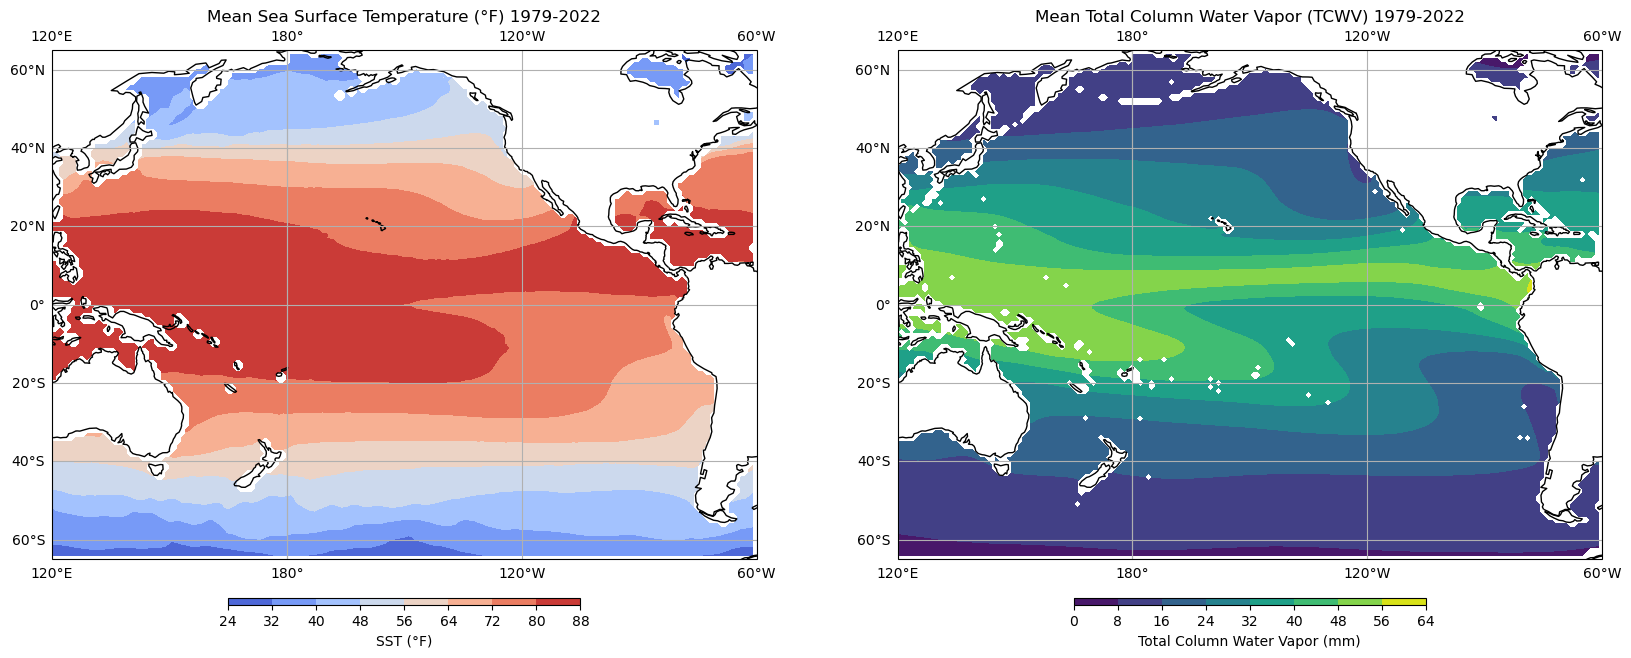

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

# Plot SST on the first subplot
sst_plot = ax1.contourf(lon, lat, sst_mean_f, cmap='coolwarm', transform=ccrs.PlateCarree())
ax1.coastlines()
ax1.gridlines(draw_labels=True)
ax1.set_title('Mean Sea Surface Temperature (°F) 1979-2022')
ax1.set_extent([120, 300, -65, 65], crs=ccrs.PlateCarree())
# Adding colorbar for SST plot
fig.colorbar(sst_plot, ax=ax1, orientation='horizontal', pad=0.05, aspect=50, shrink=0.5, label='SST (°F)')

# Plot TCWV on the second subplot
tcwv_plot = ax2.contourf(lon, lat, WaterOnly, cmap='viridis', transform=ccrs.PlateCarree())
ax2.coastlines()
ax2.gridlines(draw_labels=True)
ax2.set_title('Mean Total Column Water Vapor (TCWV) 1979-2022')
ax2.set_extent([120, 300, -65, 65], crs=ccrs.PlateCarree())
# Adding colorbar for TCWV plot
fig.colorbar(tcwv_plot, ax=ax2, orientation='horizontal', pad=0.05, aspect=50, shrink=0.5, label='Total Column Water Vapor (mm)')

plt.show()

#### Part 2) From the dataset shown in 1, compute anomalies by deseasonalizing the data (remove the mean monthly anomaly from the annual mean from each point), detrend, and standardize the SST anomalies. Standardization means subtract the long term mean and divide by the standard deviation, which can be accomplished using the methods described here: 6.3. Preprocessing data — scikit-learn 1.1.2 documentation

## Deseasonalize and Detrend the sst data

In [14]:

from scipy import signal

# First, calculate the monthly mean anomaly for each point by subtracting the long-term monthly mean from each month's value. 
# This removes the seasonal cycle.

# Handling infinite values by replacing them with NaN
sst = sst.where(np.isfinite(sst), np.nan)
# Calculating climatology (monthly means) and anomalies, skipping NaN values
climatology = sst.groupby('time.month').mean('time', skipna=True)
anomalies = sst.groupby('time.month') - climatology


# Detrending the anomalies. This removes the linear trend from the deseasonalized time series.
def detrend(da):
    da_no_nan = da.fillna(0)
    detrended = xr.apply_ufunc(signal.detrend, da_no_nan, kwargs={'axis': 0}, dask='allowed')
    return detrended.where(~da.isnull())
detrended_anomalies = detrend(anomalies)

detrended_anomalies

<xarray.DataArray 'Sea_surface_temperature_surface_Mixed_intervals_Average' (
                                                                             time: 516,
                                                                             lat: 130,
                                                                             lon: 180)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,  0.38342869,
          0.34954392,  0.32953492],
        [        nan,         nan,         nan, ...,  0.36373954,
          0.36387786,  0.80321541],
        ...,
        [ 0.12777244, -0.06856424, -0.08015899, ..., -0.35416543,
         -0.36359876, -0.25412776],
        [-0.17031517, -0.26517393, -0.31952842, ..., -0.40553535,
         -0.12731253, -0.0301891 ],
        [-0.32433672, -0.34750323, -0.418057  , ..., -0.65371273,
         -0.21520619, -0.47617535]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,  0.38196845,
          0.35151662,  0.33311919],
        [        nan,         nan,         nan, ...,  0.364339  ,
          0.34636538,  0.85265687],
...
        [ 0.31481135,  0.4107006 ,  0.40753237, ...,  0.34951266,
          0.40547761,  0.62918372],
        [ 0.02414256,  0.13141766,  0.21549724, ...,  0.40502109,
          0.45244556,  0.48932394],
        [-0.09853184, -0.08727549, -0.07792478, ...,  0.24707919,
          0.33511202,  0.15685398]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -0.25884269,
         -0.26819409, -0.26765971],
        [        nan,         nan,         nan, ..., -0.21371787,
         -0.27703752, -0.02584727],
        ...,
        [-0.00461477, -0.00999366, -0.05573728, ...,  0.02289728,
         -0.07981238,  0.06580409],
        [ 0.02000785,  0.00679797,  0.01798494, ...,  0.08541713,
          0.01951389, -0.02609236],
        [-0.04729804, -0.03649673,  0.02787443, ...,  0.13161837,
          0.23753098,  0.23337795]]])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-16T12:00:00 ... 2021-12-16T12:00:00
    reftime  (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
  * lat      (lat) int32 65 64 63 62 61 60 59 58 ... -58 -59 -60 -61 -62 -63 -64
  * lon      (lon) int32 120 121 122 123 124 125 126 ... 294 295 296 297 298 299
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

### Part 3) Perform an EOF analysis (with cosine latitude weighting) on the SST anomalies and plot a map of the first 5 EOFs.

In [15]:
from eofs.xarray import Eof
from eofs.examples import example_data_path

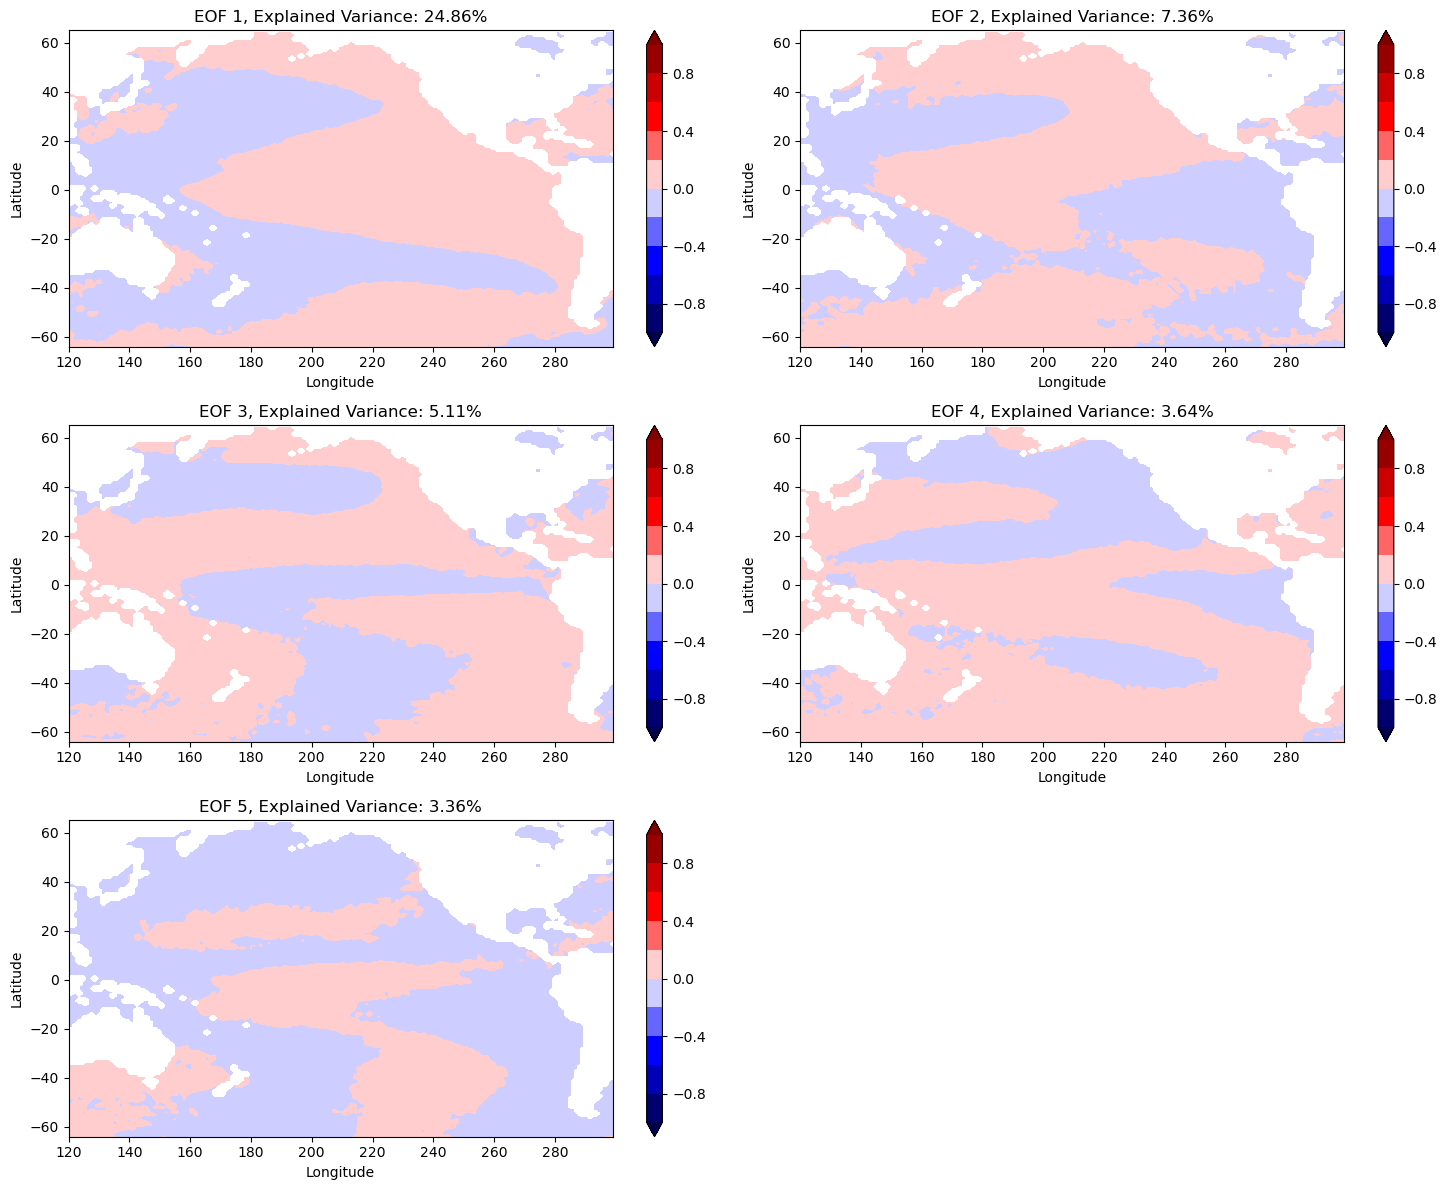

2024-03-04 19:32:21,390 - tornado.application - ERROR - Uncaught exception GET /status/ws (127.0.0.1)
HTTPServerRequest(protocol='http', host='127.0.0.1:5555', method='GET', uri='/status/ws', version='HTTP/1.1', remote_ip='127.0.0.1')
Traceback (most recent call last):
  File "c:\Users\brand\anaconda3\envs\BrandonEnv\Lib\site-packages\tornado\websocket.py", line 937, in _accept_connection
    open_result = handler.open(*handler.open_args, **handler.open_kwargs)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\brand\anaconda3\envs\BrandonEnv\Lib\site-packages\tornado\web.py", line 3290, in wrapper
    return method(self, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\brand\anaconda3\envs\BrandonEnv\Lib\site-packages\bokeh\server\views\ws.py", line 149, in open
    raise ProtocolError("Token is expired.")
bokeh.protocol.exceptions.ProtocolError: Token is expired.


In [27]:
# First, prepare a latitude array with cosine weighting
coslat = np.cos(np.deg2rad(detrended_anomalies.coords['lat'].values)).clip(0., 1.)
weights = np.sqrt(coslat)[..., np.newaxis]

# Create an EOF solver. Assuming detrended_anomalies is 3D: time, lat, lon
solver = Eof(detrended_anomalies, weights=weights)

# Calculate the first 5 EOFs and their explained variances
eofs = solver.eofs(neofs=5)
variance_fraction = solver.varianceFraction(neigs=5)

# Plot the 5 EOF's
plt.figure(figsize=(15, 12))
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.contourf(eofs.coords['lon'], eofs.coords['lat'], eofs[i], levels=np.linspace(-1, 1, 11), extend='both', cmap='seismic')
    plt.title(f'EOF {i+1}, Explained Variance: {variance_fraction[i].values*100:.2f}%')
    plt.colorbar()
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

plt.tight_layout()
plt.show()


### Part 5) Plot the percent of variance explained by the first 10 EOFs.

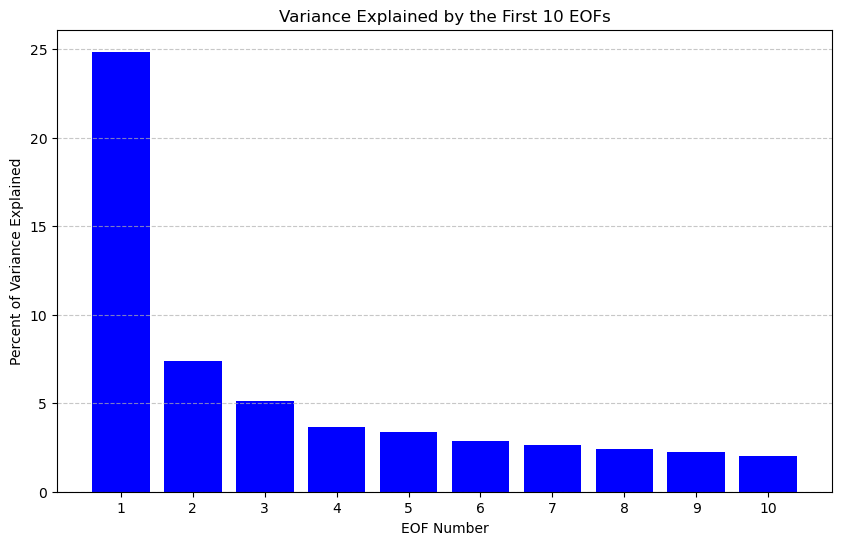

In [29]:

# Calculate the variance fraction for the first 10 EOFs
variance_fraction = solver.varianceFraction(neigs=10).values * 100  # Convert to percentage

# Generate the EOF indices (1-based indexing for plotting)
eof_indices = range(1, 11)

# Plot the variance in the first 10 EOF
plt.figure(figsize=(10, 6))
plt.bar(eof_indices, variance_fraction, color='blue')
plt.xlabel('EOF Number')
plt.ylabel('Percent of Variance Explained')
plt.title('Variance Explained by the First 10 EOFs')
plt.xticks(eof_indices)  # Ensure x-ticks match the EOF numbers
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Part 5) Reconstruct the SST field using the first 5 EOFs and plot a map of the Pearson's correlation coefficient (xarray.corr) of the reconstructed monthly time series and the "observed" SST time series.



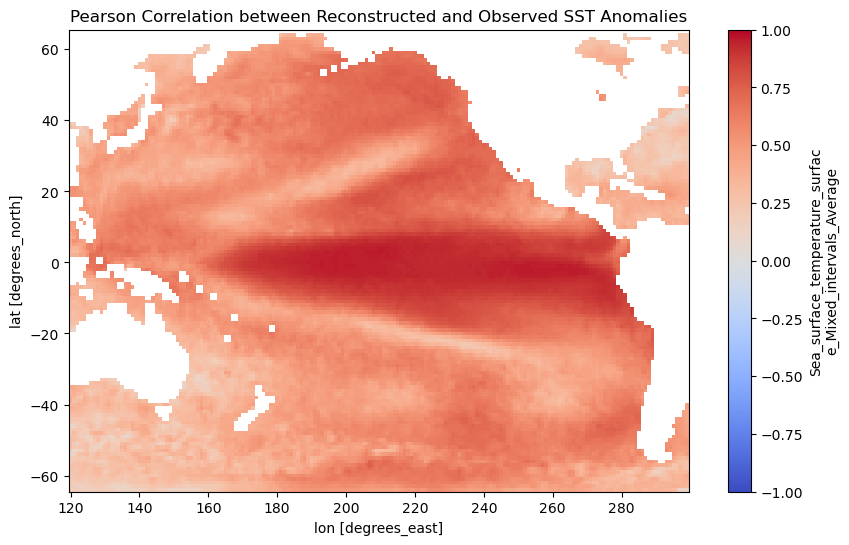

In [30]:
# Lets start with reconstructing the SST field using the first 5 EOFs
pcs = solver.pcs(npcs=5, pcscaling=1) # Project the SST anomalies onto the first 5 EOFs to get their principal component time series
reconstructed_sst = solver.reconstructedField(5) # Reconstruct the spatial field from these components.

# Now lets calculate the Pearson's correlation coefficient between the reconstructed and observed SSTs using xr.corr()
correlation_map = xr.corr(reconstructed_sst, detrended_anomalies, dim='time')

# Plot the correlation map
plt.figure(figsize=(10, 6))
correlation_map.plot(cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation between Reconstructed and Observed SST Anomalies')
plt.show()

### Part 6) Compute a map of the Pearson's correlation coefficient between SST EOF1 and monthly mean detrended, deseasonalized, and standardized monthly mean precipitation anomalies (don't mask these over land for the plot). See anything interesting?

In [37]:
# Lets rename the variable so its easier moving forward
tcwv = total_water

# Deseasonalize, detrend, and standardize the total column water vapor

# First, calculate the monthly mean anomaly for each point by subtracting the long-term monthly mean from each month's value. 
# This removes the seasonal cycle.

# Handling infinite values by replacing them with NaN
tcwv = tcwv.where(np.isfinite(sst), np.nan)

# Calculating climatology (monthly means) and anomalies, skipping NaN values
climatology2 = tcwv.groupby('time.month').mean('time', skipna=True)
anomalies2 = tcwv.groupby('time.month') - climatology2


# Detrending the anomalies. This removes the linear trend from the deseasonalized time series.
def detrend(da):
    da_no_nan2 = da.fillna(0)
    detrended2 = xr.apply_ufunc(signal.detrend, da_no_nan2, kwargs={'axis': 0}, dask='allowed')
    return detrended2.where(~da.isnull())
detrended_anomalies2 = detrend(anomalies2)

detrended_anomalies2

<xarray.DataArray 'Total_column_water_vapour_surface_Mixed_intervals_Average' (
                                                                               time: 516,
                                                                               lat: 130,
                                                                               lon: 180)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,  1.69156486,
          1.76687381,  1.83648046],
        [        nan,         nan,         nan, ...,  1.70719223,
          1.77791023,  1.85491071],
        ...,
        [-1.20569346, -1.21868761, -1.28275343, ...,  1.03237053,
          0.94592059,  0.83827751],
        [-1.28653597, -1.29915679, -1.30730381, ...,  0.7699034 ,
          0.68950272,  0.57581343],
        [-1.29088358, -1.29694364, -1.28610683, ...,  0.67567978,
          0.61029842,  0.44382702]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,  1.05969572,
          1.2543402 ,  1.46918032],
        [        nan,         nan,         nan, ...,  1.2221355 ,
          1.47301193,  1.77139987],
...
        [-1.11240698, -1.10052391, -1.07249723, ...,  0.31876289,
          0.29666399,  0.29101456],
        [-1.07364237, -1.06779193, -1.05552443, ...,  0.47964129,
          0.48087479,  0.48109677],
        [-1.0282662 , -1.02552808, -0.99271352, ...,  0.51200736,
          0.5554026 ,  0.39197063]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,  0.50221514,
          0.57119332,  0.64835513],
        [        nan,         nan,         nan, ...,  0.42663204,
          0.50522583,  0.59884573],
        ...,
        [ 0.65598836,  0.69052897,  0.67765038, ...,  0.28616987,
          0.28922034,  0.29435265],
        [ 0.76720961,  0.66831371,  0.52437184, ...,  0.30015816,
          0.29185623,  0.27141549],
        [ 0.32106298,  0.15798451, -0.02623758, ...,  0.39224427,
          0.35832244,  0.27730264]]])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-16T12:00:00 ... 2021-12-16T12:00:00
    reftime  (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
  * lat      (lat) int32 65 64 63 62 61 60 59 58 ... -58 -59 -60 -61 -62 -63 -64
  * lon      (lon) int32 120 121 122 123 124 125 126 ... 294 295 296 297 298 299
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [ ]:
# Reconstruct for just eof1
reconstructed_eof1 = solver.reconstructedField(1) # Reconstruct the spatial field from these components.

# Compute Pearson's correlation coefficient between SST EOF1 and precipitation anomalies
correlation_map2 = xr.corr(reconstructed_eof1, detrended_anomalies2, dim='time')

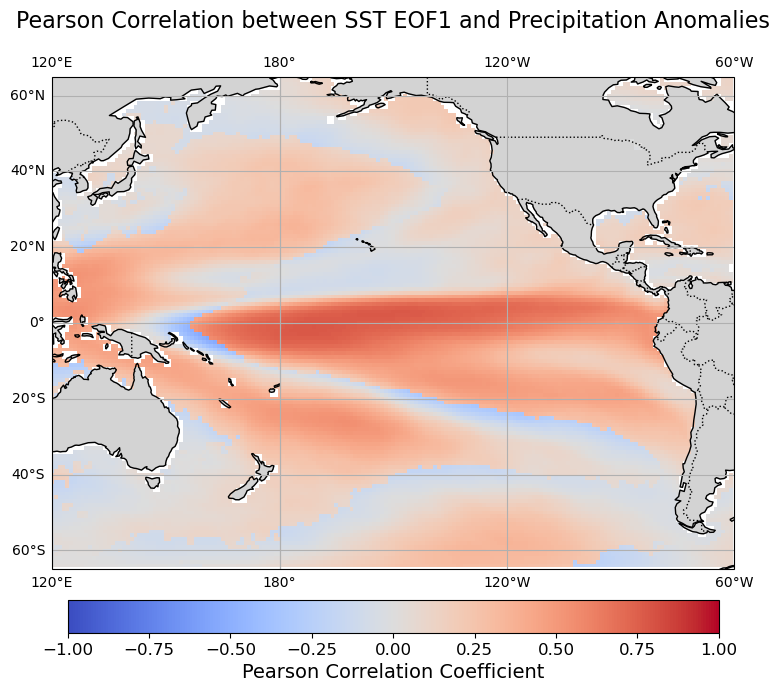

In [61]:

# Set up the map projection and figure
proj = ccrs.PlateCarree(central_longitude=180)  # Central longitude at 180
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': proj})

# Set the extent to focus on the Pacific region
ax.set_extent([120, 300, -65, 65], crs=ccrs.PlateCarree())

# Plot the correlation map
pcm = ax.pcolormesh(correlation_map2['lon'], correlation_map2['lat'], correlation_map2,
                    cmap='coolwarm', vmin=-1, vmax=1, transform=ccrs.PlateCarree())

# Add features to the map for better geographical context
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color='lightgrey')

# Add gridlines
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add a colorbar
cbar = fig.colorbar(pcm, ax=ax, shrink=0.7, orientation='horizontal', pad=0.05)
cbar.set_label('Pearson Correlation Coefficient', fontsize=14)
cbar.ax.tick_params(labelsize=12)

# Set the title
ax.set_title('Pearson Correlation between SST EOF1 and Precipitation Anomalies', fontsize=16, pad=20)

plt.show()


#### For Part 6, the correlation seen here is a correlation between anomalies in the pattern of the sst anomalies identified by EOF1 and the cloud water anomalies in the form of total column water vapor anomalies. 

#### Positive correlations (values closer to 1) indicate a positive relationship between SST EOF1 and precipitation anomalies, while negative correlations (values closer to -1) indicate a negative relationship. We can see the region around the equator has a very strong correlation with precipitation anomalies as well as some sections of the western pacific. From this we can gather that precipitation anomalies appear to have a strong relationship wiuth the El Niño-Southern Oscillation (ENSO), since that entire region where the pattern operates has a high positive correlation (relatively) compared to the surrounding waters.

